# Analysis of Extracted Data

### Importing the CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tweet_df=pd.read_csv('twitter_data.csv')

In [3]:
tweet_df.head()

,Unnamed: 0,UserID,Name,Tweet,Mentions,Created At,Retweet,Likes,Location
0,0,5125_uttam,UTTAM SALUNKE,@VanchitRuttank: #HarGharTiranga \nहा राष्ट्री...,"['वंचित वृत्तांक अधिकृत', 'Prakash Ambedkar']",2022-09-02 19:00:51+00:00,1,0,NaN
1,1,Sangeeta_IND92,Sangeeta Tiwari,@AbhishektiBJP: #HarGharTiranga ....तिरंगा हमा...,['Abhishek Tiwari'],2022-09-02 18:57:07+00:00,1,0,NaN
2,2,profpicturebot,Bot,"@AbhishektiBJP: #NewProfilePic\n""तिरंगा हमें ज...",['Abhishek Tiwari'],2022-09-02 18:57:04+00:00,1,0,location
3,3,Sangeeta_IND92,Sangeeta Tiwari,"@AbhishektiBJP: #NewProfilePic\n""तिरंगा हमें ज...",['Abhishek Tiwari'],2022-09-02 18:57:01+00:00,1,0,NaN
4,4,Sangeeta_IND92,Sangeeta Tiwari,@AbhishektiBJP: भारत के राष्ट्रीय ध्वज के रचना...,['Abhishek Tiwari'],2022-09-02 18:56:50+00:00,1,0,NaN


In [4]:
tweet_df["UserID"].value_counts()

BaramullaNyk       1535
YuvaGurdaspur      1215
NYKAnantnag         886
Andhravilasnews     752
nyk_budgam          550
                   ... 
sandeep30766558       1
Aaaaaaa48043398       1
onlyiffat             1
rpfpchgyd             1
BharatPhonde5         1
Name: UserID, Length: 12253, dtype: int64

In [5]:
top_mentions=tweet_df["Mentions"].value_counts()[:10]
top_mentions

['Narendra Modi']                     2609
['NYKS India']                        1932
[]                                    1672
['Dera Sacha Sauda']                   901
['Amrit Mahotsav']                     814
['Pawan Kalyan', 'Amrit Mahotsav']     489
['SMG Haryana']                        448
['Mahesh Babu']                        432
['Bhāratvarṣam']                       399
['Blue Chip']                          365
Name: Mentions, dtype: int64

In [6]:
tweet_df["Retweet"].value_counts()

1    33680
0     2267
Name: Retweet, dtype: int64

In [7]:
topUsers=tweet_df["UserID"].value_counts()[:10]
topUsers

BaramullaNyk       1535
YuvaGurdaspur      1215
NYKAnantnag         886
Andhravilasnews     752
nyk_budgam          550
RahulVerma1971      504
nyks_doda           488
therkmalviya        473
nykkinnaur          399
JammuNehru          363
Name: UserID, dtype: int64

### Visualizing Data

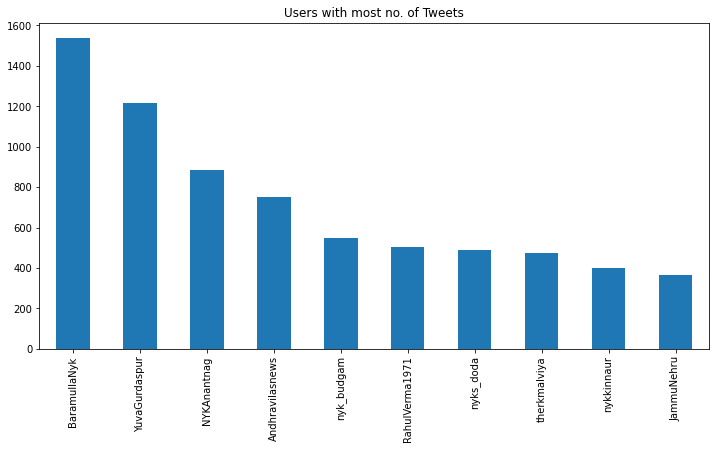

In [8]:
plt.figure(figsize=(12,6))
topUsers.plot.bar();
plt.title("Users with most no. of Tweets")
plt.show()

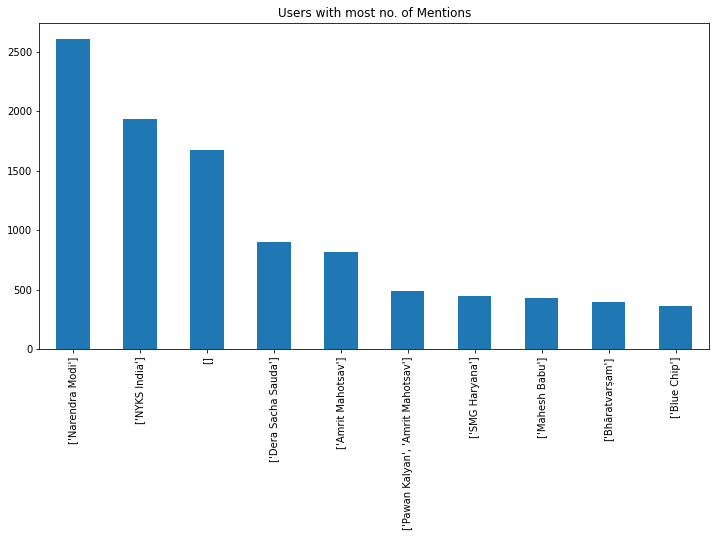

In [9]:
plt.figure(figsize=(12,6))
top_mentions.plot.bar();
plt.title("Users with most no. of Mentions")
plt.show()

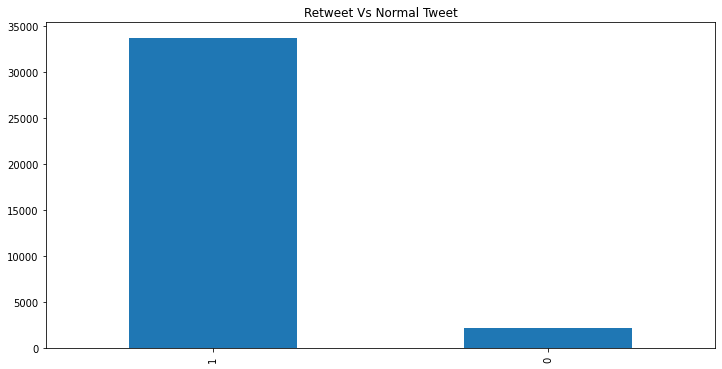

In [10]:
rtVsT=tweet_df["Retweet"].value_counts()
plt.figure(figsize=(12,6))
rtVsT.plot.bar();
plt.title("Retweet Vs Normal Tweet")
plt.show()

### Using NetworkX

In [11]:
import networkx as nx

In [12]:
G = nx.Graph()

In [13]:
NODES=list(set(tweet_df["UserID"]))
len(NODES)

12253

In [14]:
G.add_nodes_from(NODES)

In [15]:
tweet_df.iloc[0]["Mentions"][1:-1].split(',')[0][1:-1]

'वंचित वृत्तांक अधिकृत'

In [16]:
EDGES=[]

for i in range(tweet_df.shape[0]):
    temp_edges=[]
    tweeted_user=tweet_df.iloc[i]["UserID"]
    mentions=tweet_df.iloc[i]["Mentions"][1:-1].split(',')
    for m in mentions:
        temp_edges.append((tweeted_user,m[1:-1]))
    EDGES.extend(temp_edges)

In [17]:
G.add_edges_from(EDGES)

In [18]:
len(G.edges)

25550

## Metrics

### Closeness Centrality

In [20]:
closeness_centrality=nx.closeness_centrality(G)

In [21]:
sorted_cc = sorted(closeness_centrality.items(), key = lambda kv: kv[1],reverse=True)

In [22]:
sorted_cc[:10]

[('Narendra Modi', 0.24997409813787205),
 ('RahulVerma1971', 0.24691931307635356),
 ('nyk_budgam', 0.23435469564049696),
 ("'Narendra Modi", 0.22440592059834333),
 ('nyks_doda', 0.22155725712828334),
 ('YuvaSbs', 0.21981089349643382),
 ('therkmalviya', 0.2171095757343814),
 ('Nykuttarkashi', 0.2153178006166518),
 ('rdnss_kolkata', 0.21529948271281776),
 ("'Amrit Mahotsav", 0.21434215038094492)]

### Number of nodes and edges

In [23]:
nodes_list=G.nodes
len(nodes_list)

16742

In [24]:
edges_list=G.edges
len(edges_list)

25550

### Degree

In [25]:
sorted(nx.degree(G),key=lambda x:x[1],reverse=True)[0:10]

[('Narendra Modi', 1870),
 ("'Narendra Modi", 492),
 ('', 454),
 ('SMG Haryana', 404),
 ('Bhāratvarṣam', 398),
 ("'Amrit Mahotsav", 385),
 ('Pawan Kalyan', 353),
 ("'Jay Shah", 316),
 ('Mahesh Babu', 315),
 ('Amrit Mahotsav', 308)]

### Betweeness Centrality

In [26]:
sorted(nx.betweenness_centrality(G, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Narendra Modi', 0.2719441063378741),
 ("'Narendra Modi", 0.12962851973461875),
 ('RahulVerma1971', 0.1066647510427123),
 ("'Amrit Mahotsav", 0.061797591970728045),
 ('', 0.05715316301146994),
 ('parvind21502443', 0.05044700420709336),
 ('SMG Haryana', 0.03818510555677492),
 ('Bhāratvarṣam', 0.037433372619779345),
 ('nyk_budgam', 0.03653621727826442),
 ("'PMO India", 0.03424812185434062)]

## Visualizing

Wall time: 17min 27s


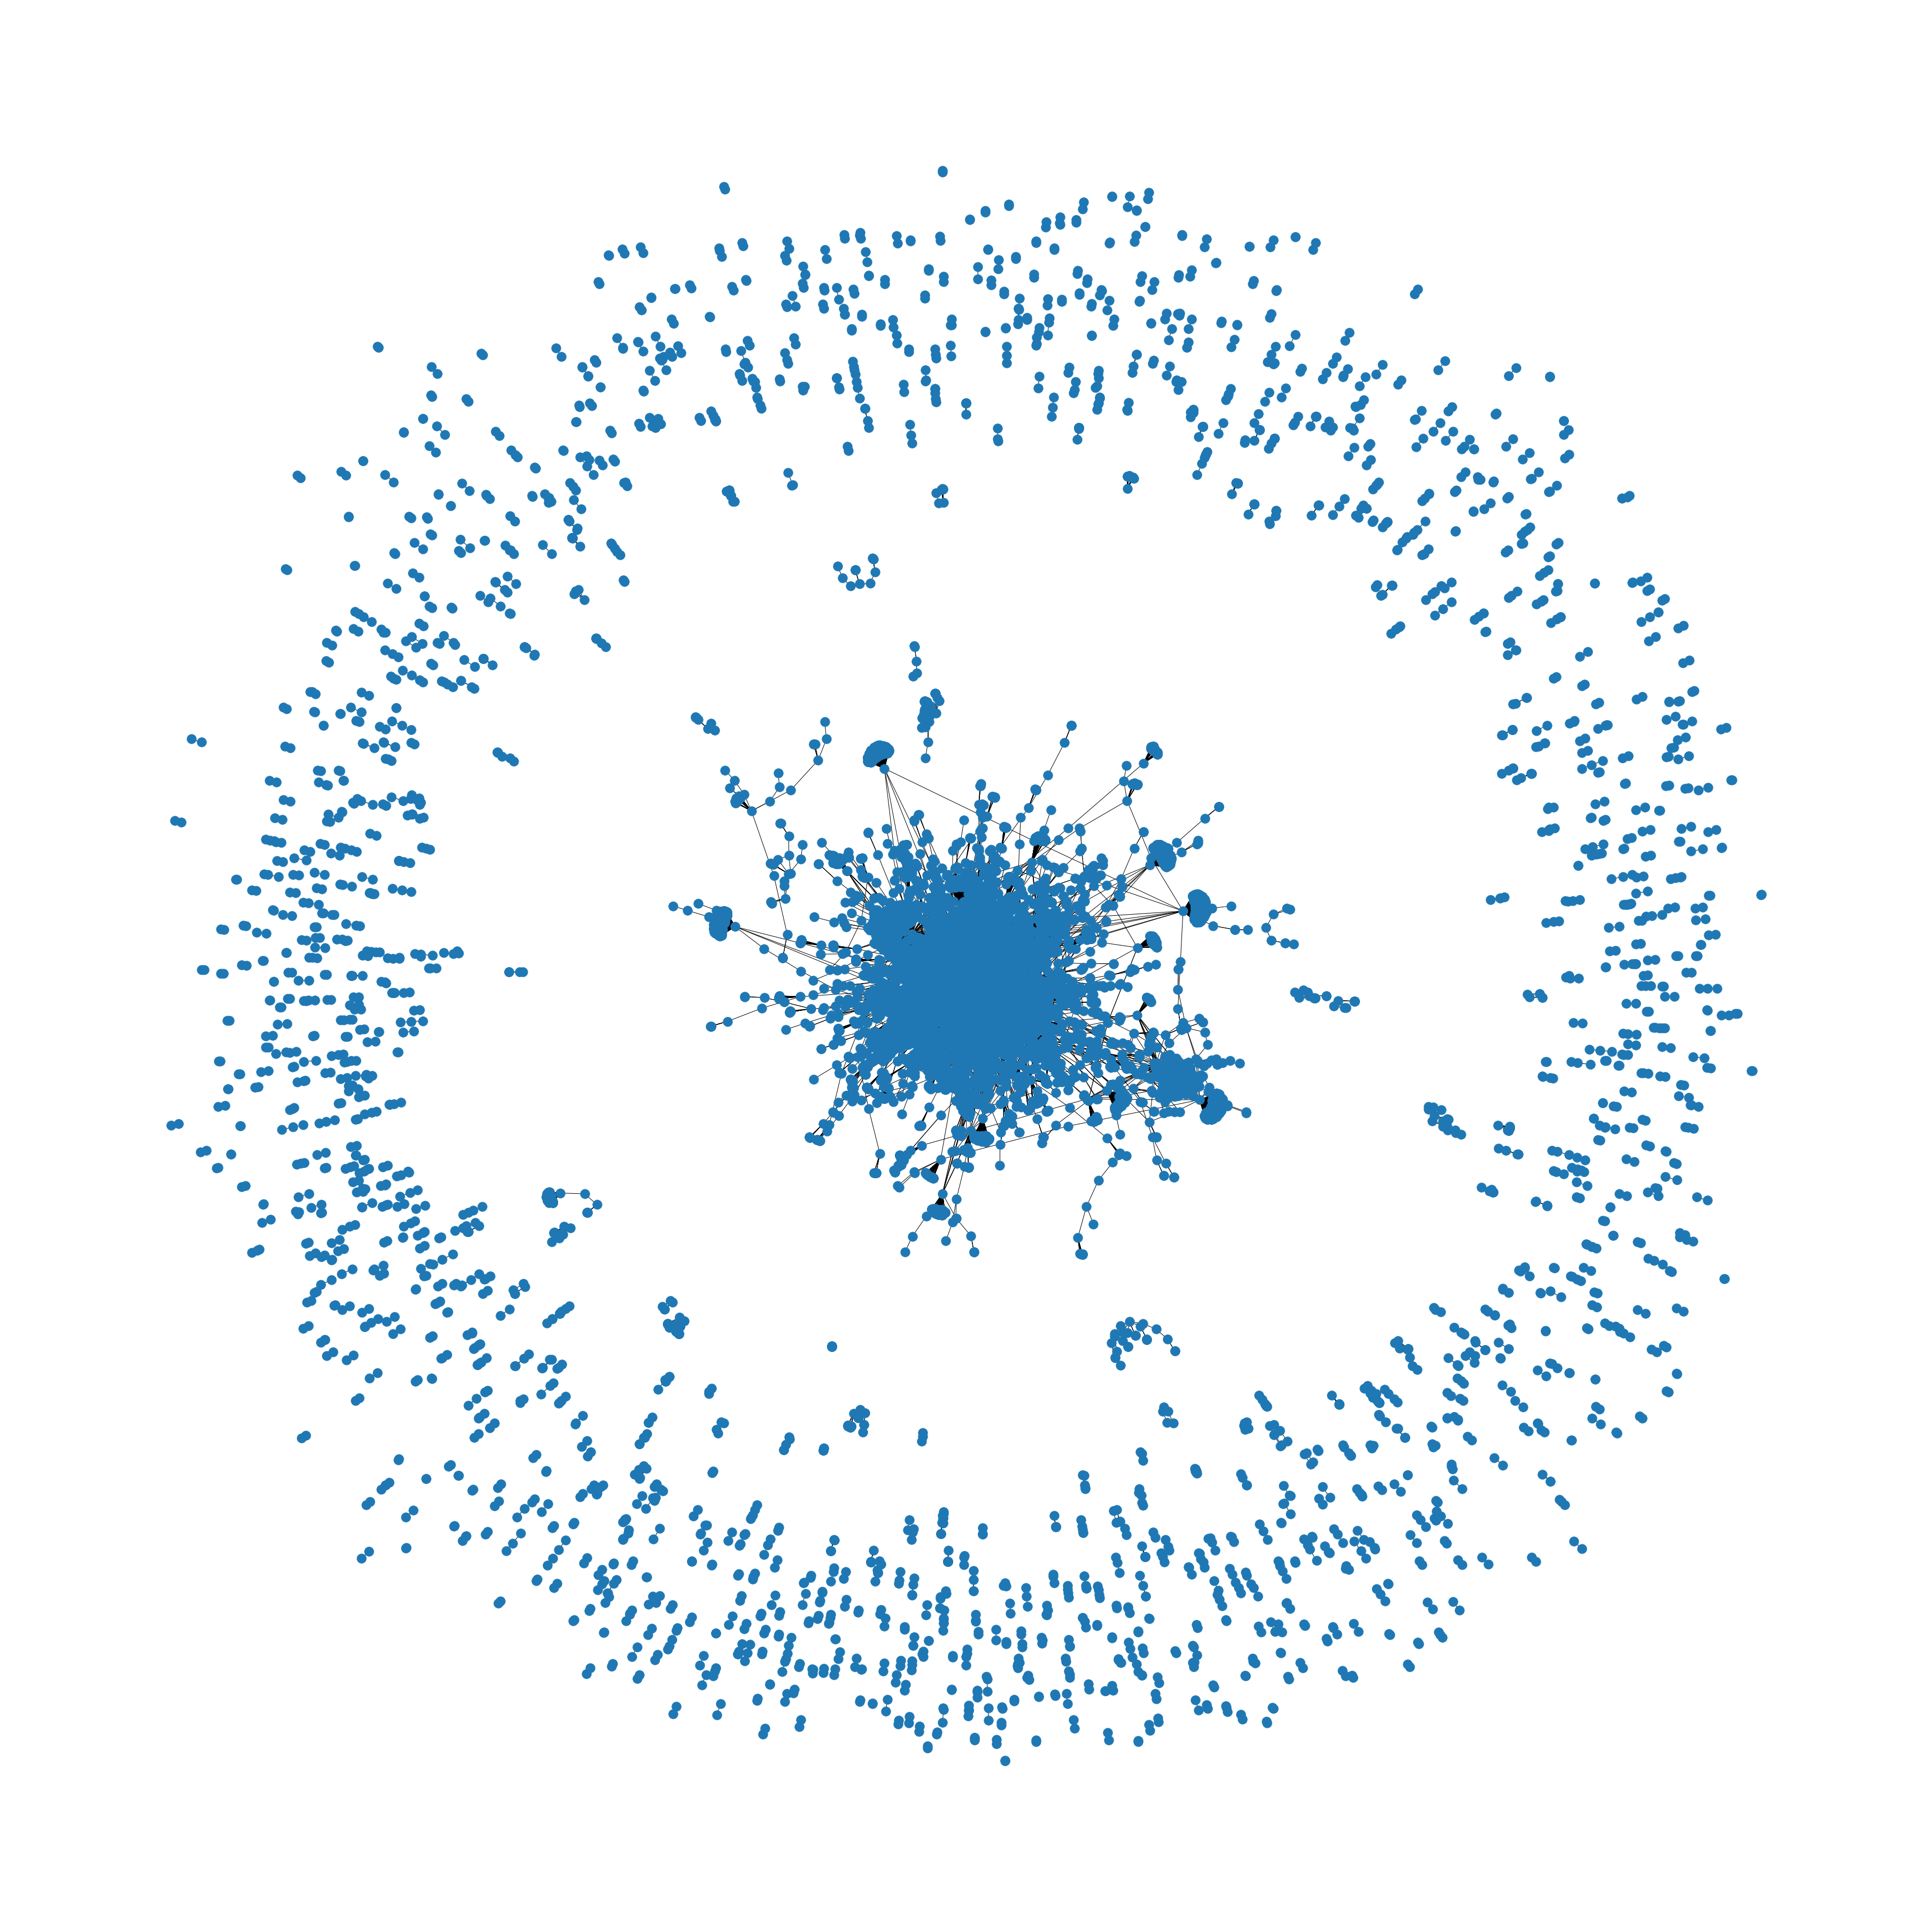

In [64]:
%%time
plt.figure(figsize=(50,50))
nx.draw(G)
plt.savefig("Twitter_NW_small.png")

In [61]:
nx.write_graphml_lxml(G,"twitter_hgt.graphml")

In [62]:
nx.write_gml(G, "test.gml")

### Degree Assortativity

In [36]:
deg_assortativity=nx.degree_assortativity_coefficient(G)

In [37]:
deg_assortativity

-0.12115644345814595

### Density

In [38]:
density=nx.density(G)
density

0.00018231909908305197

### Center

In [49]:
center=nx.center(G)

NetworkXError: Found infinite path length because the graph is not connected

### Diameter

In [50]:
diameter=nx.diameter(G)

NetworkXError: Found infinite path length because the graph is not connected

### Eccentricity

In [51]:
ecc=nx.eccentricity(G)
ecc

NetworkXError: Found infinite path length because the graph is not connected

### Maximum Independent Set

In [54]:
max_clique=nx.max_clique(G)
max_clique

AttributeError: module networkx has no attribute max_clique

### Katz centrality

In [58]:
sorted(nx.katz_centrality_numpy(G).items(),key=lambda x:x[1], reverse=True)[0:10]

[('Smita Deshmukh🇮🇳', 0.29559894993527464),
 ("'NYKS India", 0.18283665721713802),
 ('NYK_Srinagar', 0.15114085200196253),
 ('NYK JALNA (Maharashtra)', 0.1460684136197981),
 ('Nehru Yuva Kendra Aurangabad (MH)', 0.1425013623602135),
 ('nyk_new', 0.13390632303514652),
 ('JammuNehru', 0.10491743012382387),
 ('MyGovIndia', 0.08741254877492233),
 ("'PMO India", 0.07752618850103417),
 ('ChamoliNyk', 0.06885608198916464)]

### Eigen Vector centrality

In [57]:
sorted(nx.eigenvector_centrality_numpy(G).items(),key=lambda x:x[1], reverse=True)[0:10]

[('Narendra Modi', 0.7001883613741053),
 ("'Narendra Modi", 0.05704528761704693),
 ('nyk_budgam', 0.03251020927713767),
 ('YuvaSbs', 0.026460195006294),
 ('MyGovIndia', 0.024875241926933096),
 ('nyks_doda', 0.024094482427688264),
 ('RahulVerma1971', 0.023336997372289246),
 ('Nykuttarkashi', 0.02217958380860676),
 ('nykspoonch', 0.021669018459361575),
 ("'BJP Bengal", 0.0215790166954455)]

### Page Rank

In [47]:
pg_rank=nx.pagerank(G)
sorted(nx.pagerank(G).items(),key=lambda x:x[1], reverse=True)[0:10]

[('Narendra Modi', 0.04186297085359367),
 ('', 0.010896552756663931),
 ('Bhāratvarṣam', 0.010526390227753736),
 ('SMG Haryana', 0.010009491462428343),
 ('Mahesh Babu', 0.008367184750837768),
 ('இசை', 0.008172126450837971),
 ('Flag Foundation of India', 0.007677319695634268),
 ("'Narendra Modi", 0.006851293209677928),
 ('Amrit Mahotsav', 0.0062018802864517225),
 ("'Amrit Mahotsav", 0.005111321584701137)]

In [ ]:
### 

### Wordcloud

In [25]:
from wordcloud import WordCloud

In [30]:
text = " ".join(tweet.split()[1] for tweet in tweet_df.Tweet)

In [31]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

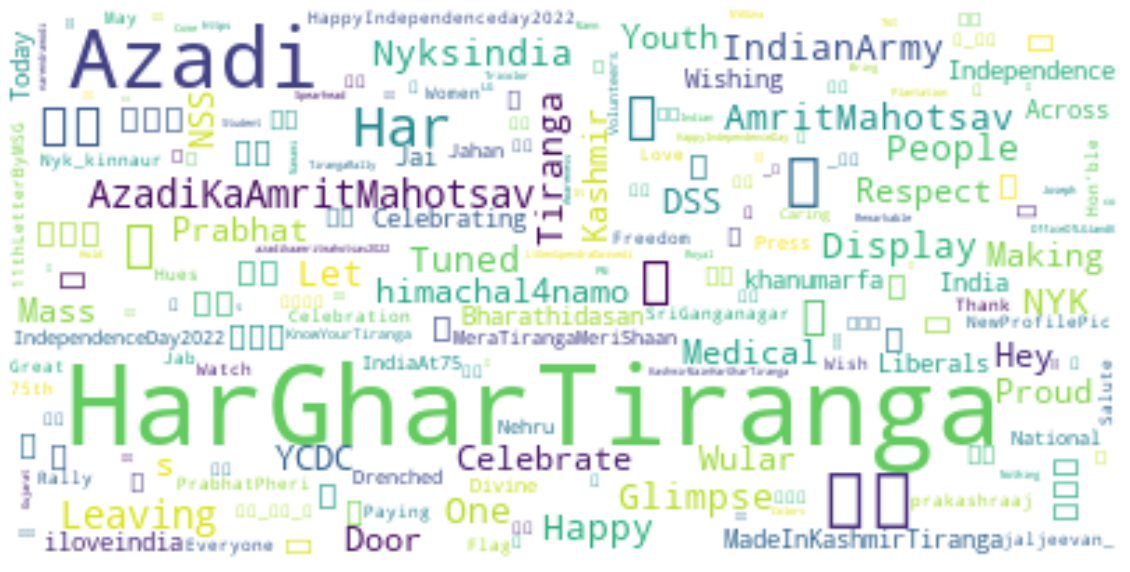

In [34]:
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()